<a href="https://colab.research.google.com/github/matteonerini/sudoku-generator-and-solver/blob/main/sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sudoku Generator and Solver

Sudoku is a logic-based puzzle in which the objective is to fill a 9x9 grid with numerical digits from 1 to 9. Each row, each column, and each 3x3 region must contain all the digits from 1 to 9.

In this script, we propose simple yet interesting recucrsive algorithms to find all the solutions of a given Sudoku, and to generate new puzzles such that they have a unique solution.

In [39]:
# Import relevant libraries
import numpy as np
from random import randint, shuffle
import matplotlib.pyplot as plt
import math

# Utility variables
d = 9
d_sqrt = int(math.sqrt(d))
numbers = list(range(1,d+1))
cells = list(range(d**2))

# Check if the cell 'grid[y,x]' can assume the value 'n'
def possible(grid,y,x,n):
    # Check if 'n' is already in row 'y' or in column 'x'
    for i in range(d):
        if grid[y][i] == n or grid[i][x] == n:
            return False
    # Check if 'n' is already in the 3x3 region
    y0 = y - (y % d_sqrt)
    x0 = x - (x % d_sqrt)
    for i in range(d_sqrt):
        for j in range(d_sqrt):
            if grid[y0 + i][x0 + j] == n:
                return False
    return True

# Backtracking algorithm implementation to solve a Sudoku
def solve(grid):
    global grid_solved
    global n_solutions
    for y in range(d):
        for x in range(d):
            if grid[y][x] == 0:
                for n in range(1,d+1):
                    if possible(grid,y,x,n):
                        grid[y][x] = n
                        solve(grid)
                        grid[y][x] = 0
                return
    print(grid)
    #input("More solutions?")
    #grid_solved = np.copy(grid)
    n_solutions+=1

# Faster implementation of the backtraking algorithm whose objective is to
# determine if the Sudoku does not have a unique solution
def solve_fast(grid):
    global grid_solved
    global n_solutions
    global end_solver
    for y in range(d):
        for x in range(d):
            if grid[y][x] == 0:
                for n in range(1,d+1):
                    if possible(grid,y,x,n):
                        grid[y][x] = n
                        solve_fast(grid)
                        if not(end_solver):
                            grid[y][x] = 0
                return
    #print(grid)
    n_solutions+=1
    if n_solutions == 2:
        end_solver = True

# Randomly fill an empty grid with dimension d
def fill(grid):
    global grid_filled
    for y in range(d):
        for x in range(d):
            if grid[y][x] == 0:
                shuffle(numbers)
                for n in numbers:
                    if possible(grid,y,x,n):
                        grid[y][x] = n
                        if not(np.all(grid)):
                            fill(grid)
                            grid[y][x] = 0
                        else:
                            grid_filled = np.copy(grid)
                return

# Create a Sudoku from a fully filled grid
def create(grid):
    global n_solutions
    global end_solver
    shuffle(cells)
    for i in range(d**2):
        y = cells[i] // d
        x = cells[i] % d
        backup = grid[y][x]
        grid[y][x] = 0
        grid_copy = np.copy(grid)
        n_solutions = 0
        end_solver = False
        solve_fast(grid_copy)
        if n_solutions != 1:
            grid[y][x] = backup
        #print('\b\b\b\b{:03d}'.format(i+1) )

# Substitute '0' with ' ' in a grid
def get_grid_str(i):
    return ' ' if i == 0 else '{}'.format(i)

# Plot the grid to create an enjoyable Sudoku
def grid2pdf(grid):
    grid_str = np.vectorize(get_grid_str)(grid)
    # Create a figure
    fig, ax = plt.subplots()
    im = ax.imshow(grid,cmap='binary', vmin=255, vmax=255)
    # Add the Sudoku clues to the figure
    for i in range(d):
        for j in range(d):
            text = ax.text(j, i, grid_str[i,j],
                           ha='center', va='center', color='k')
    # Add the lines
    plt.axhline(y=-0.5, linewidth=5, color='k')
    plt.axvline(x=-0.5, linewidth=5, color='k')
    for i in range(d-1):
        if (i+1) % d_sqrt == 0:
            plt.axhline(y=i+0.5, linewidth=3, color='k')
            plt.axvline(x=i+0.5, linewidth=3, color='k')
        else:
            plt.axhline(y=i+0.5, linewidth=1, color='k')
            plt.axvline(x=i+0.5, linewidth=1, color='k')           
    plt.axhline(y=d-0.5, linewidth=5, color='k')
    plt.axvline(x=d-0.5, linewidth=5, color='k')
    # Plot the figure without axis
    plt.axis('off')
    plt.savefig('sudoku.pdf', bbox_inches='tight')
    plt.savefig('sudoku.png', bbox_inches='tight')

## Sudoku Resolution

The function `solve`, implementing the backtraking algorithm, is called to solve a given Sudoku, specified by the variable `grid`. Thus, all the possible solutions, i.e. the complete grids, are showed.

In [40]:
# Input grid
d = 9
grid = np.array([[5, 3, 0, 0, 7, 0, 0, 0, 0],
                 [6, 0, 0, 1, 9, 5, 0, 0, 0],
                 [0, 9, 8, 0, 0, 0, 0, 6, 0],
                 [8, 0, 0, 0, 6, 0, 0, 0, 3],
                 [4, 0, 0, 8, 0, 3, 0, 0, 1],
                 [7, 0, 0, 0, 2, 0, 0, 0, 6],
                 [0, 6, 0, 0, 0, 0, 2, 8, 0],
                 [0, 0, 0, 4, 1, 9, 0, 0, 5],
                 [0, 0, 0, 0, 8, 0, 0, 7, 9]])

# Utility variables
d_sqrt = int(math.sqrt(d))
numbers = list(range(1,d+1))
cells = list(range(d**2))

n_solutions = 0
print('Solution(s):\n')
solve(grid)
#print(grid_solved)
print('\nNumber of solutions:', n_solutions)

Solution(s):

[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]

Number of solutions: 1


## Sudoky Generation

The generation of a Sudoku with unique solution takes place according to the following steps:
1. Generate a completely filled grid which satisfies the Sudoku rules with the function `fill`. This will be the unique solution of our Sudoku.
2. Iteratively, remove one random element from the grid.
3. Find the number of solutions of the new obtained grid with the function `solve_fast`, a simplified Sudoku solver.
4. If the grid has no longer a unique solution, reinsert the removed element.
5. Return to Step 2 until a certain number of iteraction is reached. The higher this number, the more difficult is the generated Sudoku since more cells are removed.

Filled grid randomly generated:
[[1 6 7 4 8 9 2 3 5]
 [8 3 9 7 5 2 6 4 1]
 [4 2 5 3 6 1 9 7 8]
 [2 4 3 6 1 5 7 8 9]
 [9 7 6 2 3 8 1 5 4]
 [5 8 1 9 4 7 3 6 2]
 [3 1 2 8 7 4 5 9 6]
 [7 5 4 1 9 6 8 2 3]
 [6 9 8 5 2 3 4 1 7]] 

Generated Sudoku:
[[1 0 7 0 0 9 0 0 5]
 [0 0 0 0 0 2 0 4 0]
 [0 0 0 0 0 1 9 0 0]
 [0 4 0 6 0 0 0 0 0]
 [9 7 0 0 0 8 1 0 0]
 [0 8 0 0 4 0 3 0 0]
 [3 0 0 0 0 4 0 9 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 5 0 0 0 0 7]]
Number of clues: 23 

Solution:
[[1 6 7 4 8 9 2 3 5]
 [8 3 9 7 5 2 6 4 1]
 [4 2 5 3 6 1 9 7 8]
 [2 4 3 6 1 5 7 8 9]
 [9 7 6 2 3 8 1 5 4]
 [5 8 1 9 4 7 3 6 2]
 [3 1 2 8 7 4 5 9 6]
 [7 5 4 1 9 6 8 2 3]
 [6 9 8 5 2 3 4 1 7]]
Number of solutions: 1 

Printed generated Sudoku:


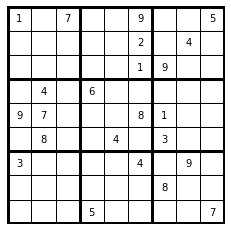

In [41]:
# Insert the dimension 'd'. Possible values: 4, 9, 16
d = 9

# Utility variables
d_sqrt = int(math.sqrt(d))
numbers = list(range(1,d+1))
cells = list(range(d**2))
grid_empty = np.zeros((d,d), dtype=int)

# Fill randomly the empty grid
fill(grid_empty)
print('Filled grid randomly generated:')
print(grid_filled, '\n')

# Create a Sudoku
print('Generated Sudoku:')
#print('Progress (/', d**2, '):   ')
create(grid_filled)
print(grid_filled)
print('Number of clues:', np.count_nonzero(grid_filled), '\n')

# Solve the created Sudoku
n_solutions = 0
print('Solution:')
solve(grid_filled)
#print(grid_solved)
print('Number of solutions:', n_solutions, '\n')

# Print the created Sudoku
print('Printed generated Sudoku:')
grid2pdf(grid_filled)